# Crime Rates in Pittsburgh by Neighborhood

In [226]:
import pandas as pd
import geopandas as gpd

In [227]:
police_arrests = pd.read_csv("police-arrests.csv")
police_arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [228]:
neighborhood_arrests = police_arrests["INCIDENTNEIGHBORHOOD"]
num_neighborhood_arrests = neighborhood_arrests.value_counts().to_frame()
num_neighborhood_arrests = num_neighborhood_arrests.rename(columns = {"INCIDENTNEIGHBORHOOD": "Number of Arrests"})

In [229]:
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Mt. Oliver Boro"])

num_neighborhood_arrests.loc["Mount Oliver"] += num_neighborhood_arrests.loc["Mt. Oliver Neighborhood"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Mt. Oliver Neighborhood"])

num_neighborhood_arrests.loc["Troy Hill"] += num_neighborhood_arrests.loc["Troy Hill-Herrs Island"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Troy Hill-Herrs Island"])

num_neighborhood_arrests.loc["Central Northside"] += num_neighborhood_arrests.loc["Central North Side"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Central North Side"])

num_neighborhood_arrests = num_neighborhood_arrests.sort_values(by=["Number of Arrests"])

In [230]:
least_crime = num_neighborhood_arrests.head()

<AxesSubplot:>

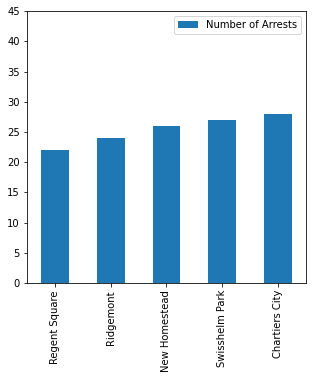

In [231]:
least_crime.plot.bar(figsize=(5,5), yticks=([i for i in range(0, 50, 5)]))

In [232]:
neighborhoods = gpd.read_file("neighborhoods.geojson")
neighborhoods.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."


<AxesSubplot:>

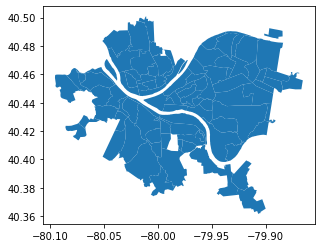

In [233]:
neighborhoods.plot()